In [4]:

import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

path = 'D:/Python/Quantum Test/Test Tesk_Internship/Quantum internship/'
data = pd.read_csv(path + 'internship_train.csv')

In [13]:
data.head()

0    1    2    3    4    5         6         7  8    9  ...         44  \
0  236  488   16  221  382   97 -4.472136  0.107472  0  132  ...  13.340874   
1  386  206  357  232    1  198  7.810250  0.763713  1  143  ...  12.484882   
2  429   49  481  111  111  146  8.602325  0.651162  1  430  ...  14.030257   
3  414  350  481  370  208  158  8.306624  0.424645  1  340  ...   2.789577   
4  318  359   20  218  317  301  8.124038  0.767304  1  212  ...   1.886560   

         45         46         47         48         49         50         51  \
0  0.870542   1.962937   7.466666  11.547794   8.822916   9.046424   7.895535   
1  7.168680   2.885415  12.413973  10.260494  10.091351   9.270888   3.173994   
2  0.394970   8.160625  12.592059   8.937577   2.265191  11.255721  12.794841   
3  6.416708  10.549814  11.456437   6.468099   2.519049   0.258284   9.317696   
4  1.919999   2.268203   0.149421   4.105907  10.416291   6.816217   8.586960   

          52     target  
0  11.010677  20.107472  
1  13.921871  61.763713  
2  12.080951  74.651162  
3   5.383098  69.424645  
4   4.512419  66.767304  

[5 rows x 54 columns]

In [14]:
y = data.target
X = data.drop('target', axis=1) # cutof  column with target label



### My first experience with regression problems, so I started look at the dependency of columns with different features.

## Linear Regression Feature Importance

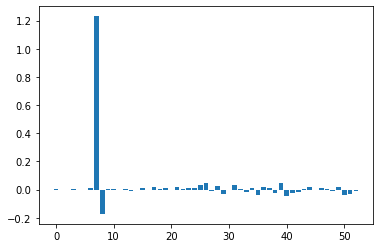

In [7]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Mutual Information Features

In [17]:
# evaluation of a model using 88 features chosen with mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions

rmse = np.sqrt(mean_squared_error(y_test, yhat))

print('RMSE: ', rmse)


RMSE:  28.747651068230283


## correlation between columns

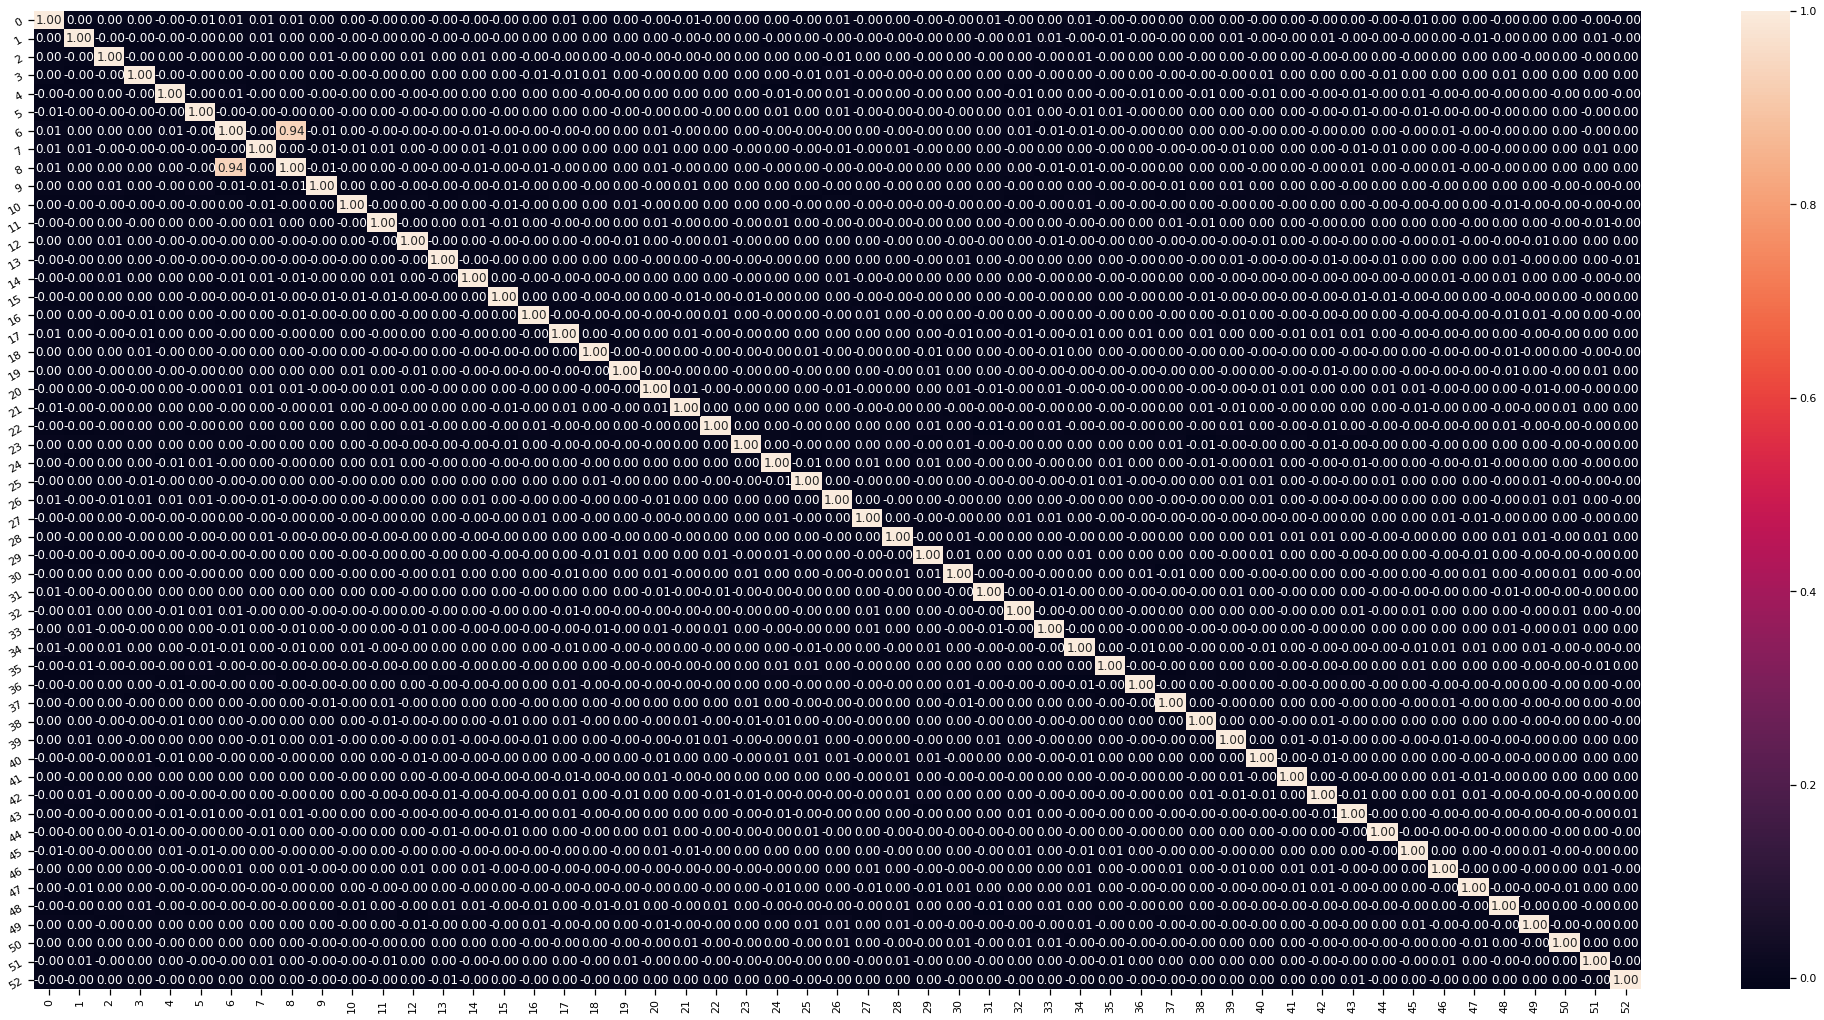

In [20]:
import seaborn as sns
corr = X.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(36,18))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Looks like its does not find any dependencies between features and target in raw data

In [23]:
fig = px.line(data, y="target", title='target image')
fig.show()

## Lets try to approximating not linearly, but by a polynomial

In [24]:
nb_degree = 2 # My leptop can't use higher degree
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_TRANSF, y, test_size=0.2)

model = LinearRegression() #define and train a model
model.fit(X_train, y_train)

#----------------------------------------------------------------------------------------#
Y_PRED = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,Y_PRED))

print('RMSE: ', rmse)

#----------------------------------------------------------------------------------------#


RMSE:  1.8319134648021115e-10


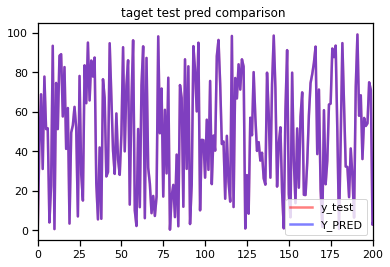

In [28]:
arr = np.asarray(y_test)
plt.plot(arr,label='y_test',color="red",alpha=0.5)
plt.plot( Y_PRED,label='Y_PRED',color="blue",alpha=0.5)
plt.title("taget test pred comparison ")
plt.legend ()
plt.xlim(0,  200)
plt.show()  



###  RMSE shows a suspiciously good result, not sure if he can be trusted, but still let's go to the prediction

# target prediction

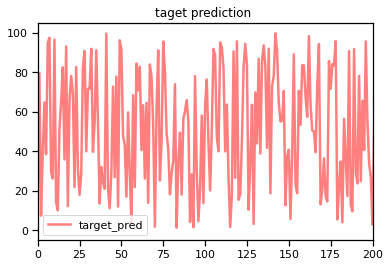

In [25]:
data_pr = pd.read_csv(path + 'internship_hidden_test.csv')

X_target_features = polynomial_features.fit_transform(data_pr)
y_target_pred = model.predict(X_target_features)

target_pred = np.asarray(y_target_pred)

plt.plot(target_pred,label='target_pred',color="red",alpha=0.5)
plt.title("taget prediction ")


plt.legend ()

plt.xlim(0,  200)
plt.show()  
data_pr

data_pr["target"] = target_pred
data_pr.to_csv(path+'internship_hidden_test_with_target_predicted.csv')


In [26]:
data_pr.head()

0    1    2    3    4    5         6         7  8    9  ...         44  \
0  259  388  402  340  156  382  3.316625  0.218760  1  164  ...  10.227235   
1  441  192  381  421  452  123 -8.888194  0.700228  0  349  ...   9.339161   
2   83  129  107  156  247  191  2.645751  0.494556  1  297  ...  10.670237   
3  183  438  191  116  491  403 -6.164414  0.511117  0  272  ...  12.782579   
4  449  156  310  188  279  465  8.000000  0.756416  1   90  ...   1.140498   

          45        46         47         48         49         50         51  \
0   0.889111  9.190222   4.670908   0.931525   7.634177   0.158196  13.432551   
1   4.221861  0.595563  13.865748   0.328453  11.507599   9.107966   1.302407   
2  10.350867  5.134417   5.898995   8.374986   4.638049   3.160023   2.243799   
3   0.513072  0.321295  11.334062  11.735511   1.911520   8.365676   4.877288   
4  14.165074  7.688796   5.079241   8.152186   1.680403  13.215111   5.823109   

          52     target  
0   2.511191  11.218760  
1  11.105604  79.700228  
2   5.073030   7.494556  
3  11.601819  38.511117  
4   1.038015  64.756416  

[5 rows x 54 columns]